In [1]:
from Levenshtein import editops # To track actions for transpositions
from nltk import edit_distance # For Damerau–Levenshtein distance

import os

from denovo_utils.data import Run
from denovo_utils.parsers import DenovoEngineConverter
from denovo_utils.io.read import load_psmlist

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from denovo_utils.analysis.metrics import load_seq_score_dicts
from denovo_utils.analysis.metrics import get_match_score_table, get_prc_curve

from psm_utils import Peptidoform
from tqdm import tqdm
from peak_pack.utils import calculate_ppm

from denovo_utils.analysis.metrics import (
    get_refinement_error_tables,
    plot_refinement_error_table,
    plot_precision_recall_refinement
)

import pandas as pd

from denovo_utils.analysis.error_types import SequenceComparison

from tqdm import tqdm

2025-07-12 14:18:28.838460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-12 14:18:28.859101: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-12 14:18:28.865535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Modification already exists in ModificationsDB. Skipping.


In [2]:
engine_order = ['casanovo', 'novob', 'instanovo', 'contranovo', 'pepnet']
engine_order_renamed = ['CasaNovo', 'NovoB', 'InstaNovo', 'ContraNovo', 'PepNet']

denovo_engines = [
    'casanovo',
    'novob',
    'instanovo',
    'pepnet',
    'contranovo',
    'pi-PrimeNovo',
    'AdaNovo',
    'pi-HelixNovo'
]

# 1. Read in the data

In [ ]:
# # root_results_dn = '/public/compomics3/Sam/PXD028735/QExactive/denovo_output'
# # root_mgf = '/public/compomics3/Sam/PXD028735/QExactive/mgf_reformatted'
# # root_results_db = '/public/compomics3/Sam/PXD028735/QExactive/search_results/identification'

# root_rescoring = '/public/compomics3/Sam/PXD028735/QExactive/rescoring'

# run_names = [
#     'LFQ_Orbitrap_DDA_Ecoli_01',
#     'LFQ_Orbitrap_DDA_Human_01',
#     'LFQ_Orbitrap_DDA_QC_01',
#     'LFQ_Orbitrap_DDA_Yeast_01'
# ]

# engine_names = [
#     'adanovo',
#     'pihelixnovo',
#     'piprimenovo',
#     'casanovo',
#     'instanovo',
#     'contranovo',
#     'novob',
#     'pepnet',
# ]

# refinement_names = [
#     'spectralis',
#     'instanovoplus'
# ]

# runs = {}
# for run_name in run_names:
#     print(f"Run: {run_name}")
#     run = Run(run_name)

#     gt_path = os.path.join(root_rescoring, run_name, 'psmlist', 'ground_truth.parquet')
#     psmlist_gt = load_psmlist(gt_path)
#     run.load_data(
#         psmlist=psmlist_gt.get_rank1_psms(),
#         score_names=['score_ms2rescore'],
#         is_ground_truth=True
#     )

#     for engine_name in engine_names:
#         print(f'loading {engine_name}')

#         denovo_path = os.path.join(root_rescoring, run_name, 'psmlist', f'{engine_name}.parquet')
#         psmlist_denovo = load_psmlist(denovo_path)
#         run.load_data(
#             psmlist=psmlist_denovo,
#             score_names=['score_ms2rescore'],
#             is_ground_truth=False
#         )
    
#         # load refinement
#         for refinement_name in refinement_names:
#             refinement_path = os.path.join(root_rescoring, run_name, 'psmlist', f'{engine_name}.{refinement_name}.parquet')
#             if os.path.exists(refinement_path):
#                 print(f'    loading {refinement_name}')
#                 psmlist_refinement = load_psmlist(refinement_path)
#                 run.load_refinement(psmlist_refinement)

#     runs[run_name] = run
#     break

Run: LFQ_Orbitrap_DDA_Ecoli_01


100%|██████████| 24285/24285 [00:01<00:00, 21653.65it/s]


loading casanovo


100%|██████████| 61876/61876 [00:00<00:00, 126482.11it/s]


    loading spectralis


100%|██████████| 61876/61876 [00:09<00:00, 6866.11it/s]


    loading instanovoplus


100%|██████████| 61866/61866 [00:10<00:00, 5715.55it/s]


loading instanovo


100%|██████████| 61562/61562 [00:00<00:00, 81250.64it/s]


    loading spectralis


100%|██████████| 61562/61562 [00:08<00:00, 7106.76it/s]


    loading instanovoplus


100%|██████████| 61557/61557 [00:11<00:00, 5183.93it/s]


loading contranovo


100%|██████████| 30999/30999 [00:00<00:00, 69790.43it/s]


    loading spectralis


100%|██████████| 31017/31017 [00:04<00:00, 7138.34it/s]


    loading instanovoplus


100%|██████████| 31015/31015 [00:03<00:00, 8542.61it/s]


loading novob


100%|██████████| 61479/61479 [00:00<00:00, 82295.09it/s]


    loading spectralis


100%|██████████| 61479/61479 [00:08<00:00, 7159.78it/s]


    loading instanovoplus


100%|██████████| 61476/61476 [00:07<00:00, 8436.47it/s]


loading pepnet


100%|██████████| 62560/62560 [00:00<00:00, 81367.46it/s]


    loading spectralis


100%|██████████| 62559/62559 [00:14<00:00, 4249.75it/s]


    loading instanovoplus


100%|██████████| 62557/62557 [00:07<00:00, 8430.32it/s]


In [ ]:
# for run in runs.values():
#     for spectrum in tqdm(run.spectra.values()):
#         psm_gt = spectrum.psm_gt
#         psm_gt.scores.add_score(
#             score=psm_gt.scores.get_score('sage'),
#             metadata='score_ms2rescore',
#             score_type='peptide'
#         )
#         spectrum.compare_gt(
#             metadata_score="score_ms2rescore"
#         )
#         spectrum.compare_gt(
#             metadata_score="score_ms2rescore",
#             refinements=['Spectralis', 'InstaNovo+']
#         )

100%|██████████| 15982/15982 [00:43<00:00, 366.70it/s]


In [3]:
from denovo_utils.io.read import load_pickle
# runs = load_pickle(
#     './run_objects.pickle'
# )

runs = load_pickle(
    './run_objects_7_8.pickle'
)

# 2. Calculate Levenshtein distance

In [4]:
import numpy as np


def get_seq_comparison(psm_1, psm_2, non_symmetry_list=None, spectrum=None):
    try:
        sc = SequenceComparison(
            identifier=None,
            peptide_source=psm_1.peptidoform,
            peptide_target=psm_2.peptidoform
        )
        sc.add_evidence(
            evidence_source=psm_1.peptide_evidence,
            evidence_target=psm_2.peptide_evidence
        )
        sc.calculate_distance()
        sc.annotate_tags(with_evidence=True)
        if not sc.symmetric and non_symmetry_list is not None and spectrum is not None:
            non_symmetry_list.append(spectrum.spectrum_id)
        return sc
    except:
        raise Exception('Error for {}'.format(spectrum))
    
def construct_entry(
        comparison_type,
        psm_gt,
        psm_candidate,
        psm_refined=None,
        refinement_type=None,
        non_symmetry_list=None,
        spectrum=None
    ):

    # Get score differences
    ms2rescore_diff_gt_candidate = psm_gt.scores.get_score('score_ms2rescore') - psm_candidate.scores.get_score('score_ms2rescore')
    if psm_refined is not None:
        ms2rescore_diff_candidate_refinement = psm_candidate.scores.get_score('score_ms2rescore') - psm_refined.scores.get_score('score_ms2rescore')
        ms2rescore_diff_gt_refinement = psm_gt.scores.get_score('score_ms2rescore') - psm_refined.scores.get_score('score_ms2rescore')
    else:
        ms2rescore_diff_candidate_refinement = np.nan
        ms2rescore_diff_gt_refinement = np.nan

    # base
    entry = {
        'type': comparison_type,
        'engine': psm_candidate.engine_name,
        'refiner': refinement_type,
        'ms2rescore_diff_gt_candidate': ms2rescore_diff_gt_candidate,
        'ms2rescore_diff_candidate_refinement': ms2rescore_diff_candidate_refinement,
        'ms2rescore_diff_gt_refinement': ms2rescore_diff_gt_refinement
    }

    # Scenario 2: correct yet refined
    if comparison_type == 'correct-perturbed':
        sc = get_seq_comparison(
            psm_1=psm_gt,
            psm_2=psm_refined,
            non_symmetry_list=non_symmetry_list,
            spectrum=spectrum
        )
        entry['sc_gt_refinement'] = sc
        entry['sc_gt_candidate'] = None
        entry['sc_candidate_refinement'] = None
        
    
    elif comparison_type in ['wrong-unperturbed', 'corrected-by-refinement']:
        sc = get_seq_comparison(
            psm_1=psm_gt,
            psm_2=psm_candidate,
            non_symmetry_list=non_symmetry_list,
            spectrum=spectrum
        )
        entry['sc_gt_refinement'] = None
        entry['sc_gt_candidate'] = sc
        entry['sc_candidate_refinement'] = None

    elif comparison_type == 'wrong-wrong':
        sc_1 = get_seq_comparison(
            psm_1=psm_gt,
            psm_2=psm_refined,
            non_symmetry_list=non_symmetry_list,
            spectrum=spectrum
        )
        sc_2 = get_seq_comparison(
            psm_1=psm_gt,
            psm_2=psm_candidate,
            non_symmetry_list=non_symmetry_list,
            spectrum=spectrum
        )
        sc_3 = get_seq_comparison(
            psm_1=psm_candidate,
            psm_2=psm_refined,
            non_symmetry_list=non_symmetry_list,
            spectrum=spectrum
        )
        entry['sc_gt_refinement'] = sc_1
        entry['sc_gt_candidate'] = sc_2
        entry['sc_candidate_refinement'] = sc_3
    return entry

In [5]:
non_symmetries = {}
levenshtein_df = []

for run in runs.values():
    non_symmetries[run.run_id] = []

    for spectrum in tqdm(run.spectra.values()):
        psm_gt = spectrum.psm_gt

        for psm_candidate in spectrum.psm_candidates:
            type_ = 'ignore'
            try:
                spectralis = psm_candidate.refinement['Spectralis']
            except:
                spectralis = False
            try:
                instanovoplus = psm_candidate.refinement['InstaNovo+']
            except:
                instanovoplus = False
        
            # FIRST FOR SPECTRALIS
            for refinement, refiner_name in zip([spectralis, instanovoplus], ['Spectralis', "InstaNovo+"]):
                if refinement:
                    # Scenario 2: If the original was correct
                    unrefined = refinement[1]
                    psm_refined = refinement[0]

                    if psm_candidate.evaluation['score_ms2rescore'].error_type == 'match':
                        # Yet got perturbed anyhow
                        if not unrefined: # refinement_made[1] == True if unperturbed
                            entry = construct_entry(
                                comparison_type='correct-perturbed',
                                psm_gt=psm_gt,
                                psm_candidate=psm_candidate,
                                psm_refined=psm_refined,
                                refinement_type=refiner_name,
                                non_symmetry_list=non_symmetries[run.run_id],
                                spectrum=spectrum
                            )
                        else: # Correct and left as correct
                            continue

                    # If the original was incorrect
                    if psm_candidate.evaluation['score_ms2rescore'].error_type != 'match':
                        # And remained unchanged
                        # SCENARIO 1
                        if unrefined:
                            entry = construct_entry(
                                comparison_type='wrong-unperturbed',
                                psm_gt=psm_gt,
                                psm_candidate=psm_candidate,
                                psm_refined=psm_refined,
                                refinement_type=refiner_name,
                                non_symmetry_list=non_symmetries[run.run_id],
                                spectrum=spectrum
                            )
                            

                        # And got corrected
                        elif psm_refined.evaluation['score_ms2rescore'].error_type == 'match':
                            entry = construct_entry(
                                comparison_type='corrected-by-refinement',
                                psm_gt=psm_gt,
                                psm_candidate=psm_candidate,
                                psm_refined=psm_refined,
                                refinement_type=refiner_name,
                                non_symmetry_list=non_symmetries[run.run_id],
                                spectrum=spectrum
                            )
                            
                        
                        # And remained incorrect
                        else:
                            entry = construct_entry(
                                comparison_type='wrong-wrong',
                                psm_gt=psm_gt,
                                psm_candidate=psm_candidate,
                                psm_refined=psm_refined,
                                refinement_type=refiner_name,
                                non_symmetry_list=non_symmetries[run.run_id],
                                spectrum=spectrum
                            )
                            
                    levenshtein_df.append(entry)
                else:
                    continue

levenshtein_df = pd.DataFrame(levenshtein_df)

  0%|          | 0/15982 [00:00<?, ?it/s]

100%|██████████| 43131/43131 [09:30<00:00, 75.59it/s]  


In [6]:
# Count correct de novo predictions

n_correct = {
    engine: 0 for engine in denovo_engines
}

for run in runs.values():
    for engine in denovo_engines:
        run_engine = run.get_common_spectra(engines=[engine])
        for spectrum in tqdm(run_engine.spectra.values()):
            candidates = spectrum.get_psms_by_engine(engine)
            assert len(candidates)==1
            if candidates[0].evaluation['score_ms2rescore'].error_type=='match':
                n_correct[engine] += 1

n_predictions = {}

for engine in denovo_engines:
    n_predictions[engine] = sum([len(run.get_common_spectra([engine])) for run in runs.values()])

100%|██████████| 43061/43061 [00:00<00:00, 205319.72it/s]


In [7]:
levenshtein_df = pd.DataFrame(levenshtein_df)

In [8]:
levenshtein_df.head()

,type,engine,refiner,ms2rescore_diff_gt_candidate,ms2rescore_diff_candidate_refinement,ms2rescore_diff_gt_refinement,sc_gt_refinement,sc_gt_candidate,sc_candidate_refinement
0,wrong-wrong,AdaNovo,Spectralis,1.169548,-0.333844,0.835704,AGNGETIITSEIYTSK\nGNQETIITSEIYTSK\n{'forward':...,AGNGETIITSEIYTSK\nGNAGETIITSEIYTSK\n{'forward'...,GNAGETIITSEIYTSK\nGNQETIITSEIYTSK\n{'forward':...
1,wrong-unperturbed,AdaNovo,InstaNovo+,1.169548,NaN,NaN,None,AGNGETIITSEIYTSK\nGNAGETIITSEIYTSK\n{'forward'...,None
2,wrong-unperturbed,AdaNovo,Spectralis,-0.259732,NaN,NaN,None,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]GAEGI...,None
3,wrong-unperturbed,AdaNovo,InstaNovo+,-0.259732,NaN,NaN,None,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]GAEGI...,None
4,wrong-unperturbed,pi-HelixNovo,Spectralis,-0.259732,NaN,NaN,None,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]GAEGI...,None


In [259]:
counts_df = levenshtein_df.groupby(['engine', 'refiner'])['type'].value_counts()
counts_df.name = 'counts'
counts_df = counts_df.reset_index()

counts_df['%'] = counts_df.apply(lambda x: x['counts']/n_predictions[x['engine']], axis=1)

In [260]:
counts_df['type'].unique()

array(['wrong-unperturbed', 'wrong-wrong', 'correct-perturbed',
       'corrected-by-refinement'], dtype=object)

In [73]:
counts_df.groupby(['engine', 'refiner']).apply(
    lambda x: sum([c for c, t in zip(x['%'], x['type']) if t in [
        'wrong-wrong', 'correct-perturbed', 'corrected-by-refinement'
    ]])
)

engine        refiner   
AdaNovo       InstaNovo+    0.112607
              Spectralis    0.290828
casanovo      InstaNovo+    0.076221
              Spectralis    0.310623
contranovo    InstaNovo+    0.101808
              Spectralis    0.370466
instanovo     InstaNovo+    0.119293
              Spectralis    0.273285
novob         InstaNovo+    0.101478
              Spectralis    0.321890
pepnet        InstaNovo+    0.376693
              Spectralis    0.340793
pi-HelixNovo  InstaNovo+    0.122418
              Spectralis    0.434063
pi-PrimeNovo  InstaNovo+    0.139295
              Spectralis    0.329683
dtype: float64

In [ ]:
counts_df.groupby('refiner')

## 3. Show refinement types

In [263]:
counts_df['%'] = counts_df['%']*100

In [79]:
counts_df.columns

Index(['engine', 'refiner', 'type', 'counts', '%', '% of correct',
       '% of incorrect'],
      dtype='object')

In [82]:
counts_df.groupby(['refiner', 'type']).mean().reset_index()

,refiner,type,counts,%,% of correct,% of incorrect
0,InstaNovo+,correct-perturbed,549.625,0.329548,0.007222,0.006285
1,InstaNovo+,corrected-by-refinement,2374.000,1.325156,0.038635,0.022042
2,InstaNovo+,wrong-unperturbed,73683.750,42.105492,1.006998,0.759522
3,InstaNovo+,wrong-wrong,22563.750,12.717963,0.343278,0.217971
4,Spectralis,correct-perturbed,6592.250,3.933551,0.084393,0.075846
5,Spectralis,corrected-by-refinement,2384.000,1.360102,0.033567,0.024267
6,Spectralis,wrong-unperturbed,47606.375,26.710608,0.669970,0.471997
7,Spectralis,wrong-wrong,48664.500,28.101725,0.685883,0.503736


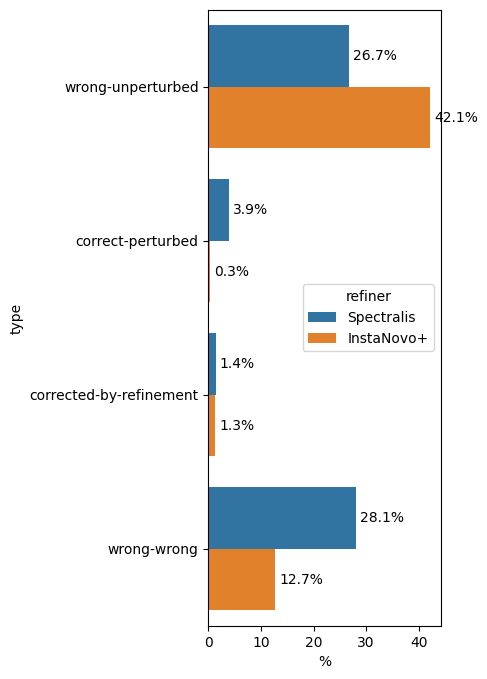

In [94]:
# Your plot
plt.figure(figsize=(3,8))
ax = sns.barplot(
    data=counts_df.groupby(['refiner', 'type']).mean().reset_index(),
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+'],
    order=['wrong-unperturbed', 'correct-perturbed', 'corrected-by-refinement', 'wrong-wrong'],
    y='type',
    x='%'
)

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

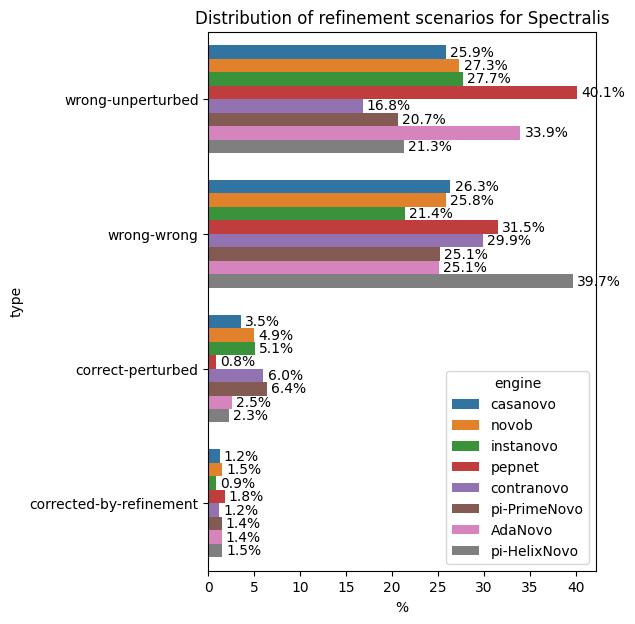

In [272]:
# Your plot
plt.figure(figsize=(5,7))
plt.title('Distribution of refinement scenarios for Spectralis')
ax = sns.barplot(
    data=counts_df[counts_df['refiner']=='Spectralis'],
    hue='engine',
    hue_order=denovo_engines,
    y='type',
    x='%'
)

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

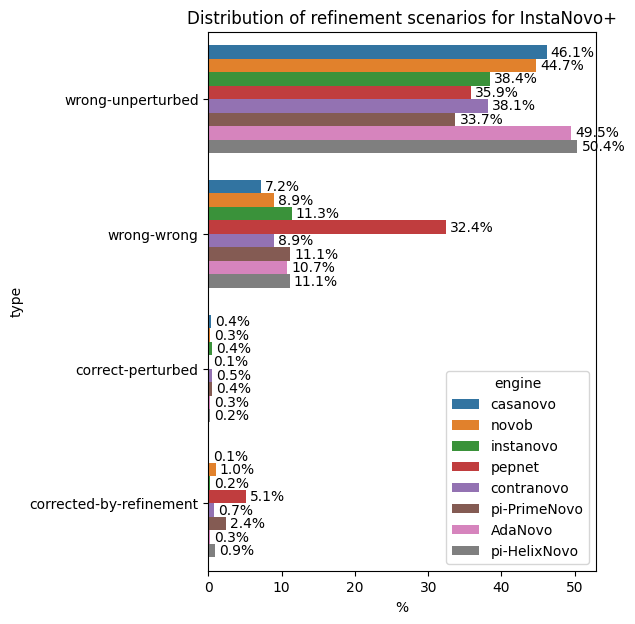

In [273]:
# Your plot
plt.figure(figsize=(5,7))
plt.title('Distribution of refinement scenarios for InstaNovo+')
ax = sns.barplot(
    data=counts_df[counts_df['refiner']=='InstaNovo+'],
    hue='engine',
    hue_order=denovo_engines,
    y='type',
    x='%'
)

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

In [13]:
counts_df[counts_df['refiner'] == 'InstaNovo+'].groupby('type')['%'].mean()

type
correct-perturbed          0.003295
corrected-by-refinement    0.013252
wrong-unperturbed          0.421055
wrong-wrong                0.127180
Name: %, dtype: float64

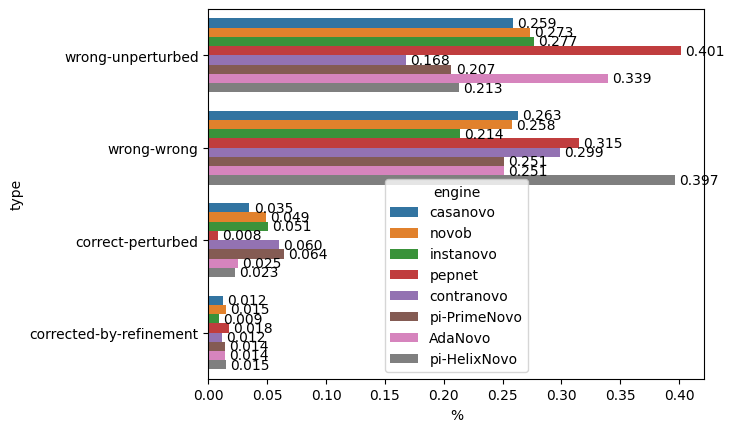

In [32]:
# Your plot
ax = sns.barplot(
    data=counts_df[counts_df['refiner'] == 'Spectralis'],
    hue='engine',
    hue_order=denovo_engines,
    y='type',
    x='%'
)

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.show()

In [15]:
counts_df['% of correct'] = counts_df.apply(lambda x: x['counts']/n_correct[x['engine']], axis=1)
counts_df['% of incorrect'] = counts_df.apply(lambda x: x['counts']/(n_predictions[x['engine']] - n_correct[x['engine']]), axis=1)

In [16]:
counts_df[counts_df['refiner'] == 'Spectralis'].groupby('type')['%'].mean()

type
correct-perturbed          0.039336
corrected-by-refinement    0.013601
wrong-unperturbed          0.267106
wrong-wrong                0.281017
Name: %, dtype: float64

In [17]:
counts_df[counts_df['refiner'] == 'Spectralis'].groupby('type')['% of correct'].mean()

type
correct-perturbed          0.084393
corrected-by-refinement    0.033567
wrong-unperturbed          0.669970
wrong-wrong                0.685883
Name: % of correct, dtype: float64

In [18]:
counts_df[counts_df['refiner'] == 'InstaNovo+'].groupby('type')['% of correct'].mean()

type
correct-perturbed          0.007222
corrected-by-refinement    0.038635
wrong-unperturbed          1.006998
wrong-wrong                0.343278
Name: % of correct, dtype: float64

In [19]:
counts_df[counts_df['refiner'] == 'InstaNovo+'].groupby('type')['% of incorrect'].mean()

type
correct-perturbed          0.006285
corrected-by-refinement    0.022042
wrong-unperturbed          0.759522
wrong-wrong                0.217971
Name: % of incorrect, dtype: float64

In [20]:
counts_df[counts_df['refiner'] == 'Spectralis'].groupby('type')['% of incorrect'].mean()

type
correct-perturbed          0.075846
corrected-by-refinement    0.024267
wrong-unperturbed          0.471997
wrong-wrong                0.503736
Name: % of incorrect, dtype: float64

Text(0.5, 1.0, 'InstaNovo+')

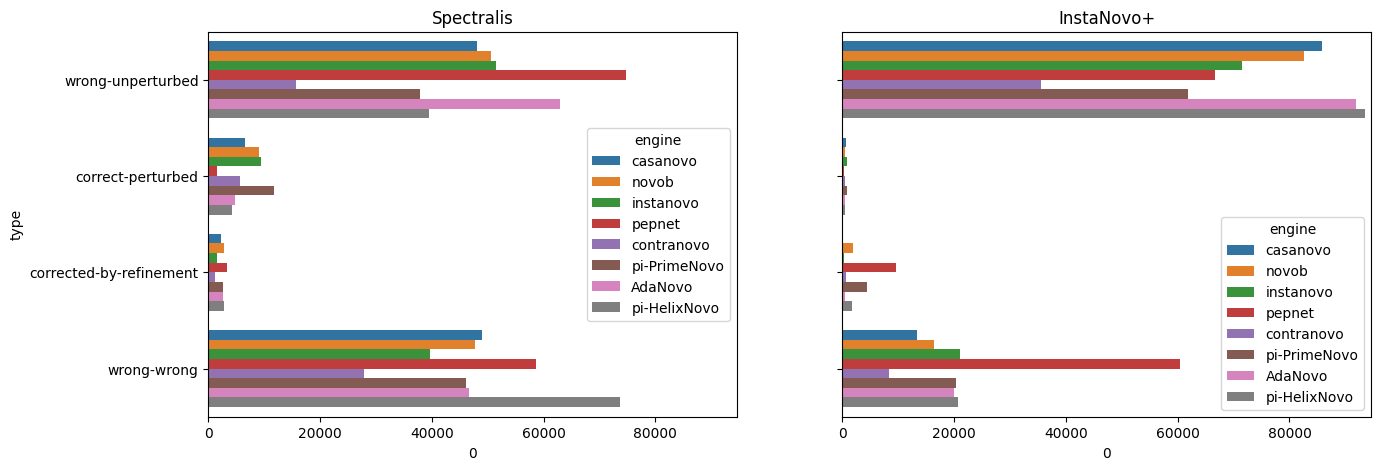

In [34]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

scenario_order = ['wrong-unperturbed', 'correct-perturbed', 'corrected-by-refinement', 'wrong-wrong']

spectralis_counts = levenshtein_df[levenshtein_df['refiner']=='Spectralis'][['engine', 'type']].value_counts().reset_index()
instanovoplus_counts = levenshtein_df[levenshtein_df['refiner']=='InstaNovo+'][['engine', 'type']].value_counts().reset_index()
sns.barplot(
    spectralis_counts,
    x=0,
    y='type',
    hue='engine',
    hue_order=denovo_engines,
    ax=ax[0],
    order=scenario_order
)
sns.barplot(
    instanovoplus_counts,
    x=0,
    y='type',
    hue='engine',
    hue_order=denovo_engines,
    ax=ax[1],
    order=scenario_order
)

x_min = 0
x_max = max(spectralis_counts[0].max(), instanovoplus_counts[0].max())

# Set the x-axis range for both plots
ax[0].set_xlim(x_min, x_max+1000)
ax[1].set_xlim(x_min, x_max+1000)

ax[0].set_title('Spectralis')
ax[1].set_title('InstaNovo+')

In [62]:
levenshtein_df.head()

,type,engine,refiner,ms2rescore_diff_gt_candidate,ms2rescore_diff_candidate_refinement,ms2rescore_diff_gt_refinement,sc_gt_refinement,sc_gt_candidate,sc_candidate_refinement
0,wrong-unperturbed,novob,Spectralis,0.098113,NaN,NaN,None,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]QEGIN...,None
1,wrong-unperturbed,novob,InstaNovo+,0.098113,NaN,NaN,None,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]QEGIN...,None
2,wrong-wrong,pepnet,Spectralis,3.344925,4.463932,7.808856,FC[UNIMOD:4]GAEGINNVITISTFR\nHIKEGINNVITISTFR\...,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]GAEGI...,FC[UNIMOD:4]GAEGIGNVITISFTR\nHIKEGINNVITISTFR\...
3,wrong-wrong,pepnet,InstaNovo+,3.344925,-3.073870,0.271054,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]GAEGI...,FC[UNIMOD:4]GAEGINNVITISTFR\nFC[UNIMOD:4]GAEGI...,FC[UNIMOD:4]GAEGIGNVITISFTR\nFC[UNIMOD:4]GAEGI...
4,wrong-wrong,casanovo,Spectralis,2.362896,-0.908688,1.454208,AATAGNGNEAAIEAQAAGVEQR\nVISADGNEAAIEAQAAGVEGAR...,AATAGNGNEAAIEAQAAGVEQR\nVISDAGNQ[UNIMOD:7]AAIE...,VISDAGNQ[UNIMOD:7]AAIEAQAAGVEGAR\nVISADGNEAAIE...


In [22]:
levenshtein_df['DL(Gold Standard) - DL(Refined PSM)'] = levenshtein_df['sc_gt_refinement'].apply(
    lambda x: None if x is None else int(x.distances['damerau-levenshtein'])
)
levenshtein_df['DL(Gold Standard) - DL(de novo PSM)'] = levenshtein_df['sc_gt_candidate'].apply(
    lambda x: None if x is None else int(x.distances['damerau-levenshtein'])
)
levenshtein_df['DL(de novo PSM) - DL(Refined PSM)'] = levenshtein_df['sc_candidate_refinement'].apply(
    lambda x: None if x is None else int(x.distances['damerau-levenshtein'])
)

levenshtein_df['L(Gold Standard) - L(Refined PSM)'] = levenshtein_df['sc_gt_refinement'].apply(
    lambda x: None if x is None else int(x.distances['levenshtein'])
)
levenshtein_df['L(Gold Standard) - L(de novo PSM)'] = levenshtein_df['sc_gt_candidate'].apply(
    lambda x: None if x is None else int(x.distances['levenshtein'])
)
levenshtein_df['L(de novo PSM) - L(Refined PSM)'] = levenshtein_df['sc_candidate_refinement'].apply(
    lambda x: None if x is None else int(x.distances['levenshtein'])
)

In [23]:
levenshtein_df['DL(Gold Standard) - DL(Refined PSM)'].dropna().astype(int)

0           2
10          4
12         11
14          6
16          3
           ..
1635340    18
1635341    18
1635342    20
1635343    18
1635345    17
Name: DL(Gold Standard) - DL(Refined PSM), Length: 626961, dtype: int64

In [24]:
from denovo_utils.io.save import save_pickle
save_pickle(levenshtein_df, 'levenshtein_table_7_14.pkl')

# 4. Plotting levenshtein distance distribution by refinement type

## 4.1 Levenshtein distance of all wrong de novo sequences

In [135]:
levenshtein_df['type'].unique()

array(['wrong-wrong', 'wrong-unperturbed', 'correct-perturbed',
       'corrected-by-refinement'], dtype=object)

<Axes: xlabel='L(Gold Standard) - L(de novo PSM)', ylabel='%'>

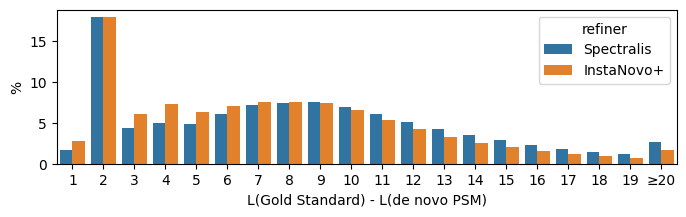

In [210]:
filtered_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-unperturbed')
]

l_count_df = filtered_df[['engine', 'L(Gold Standard) - L(de novo PSM)', 'refiner']]
l_count_df['L(Gold Standard) - L(de novo PSM)'] = l_count_df[
    ['L(Gold Standard) - L(de novo PSM)']
].astype(int)

l_count_df = l_count_df.groupby(['refiner', 'engine']).value_counts(normalize=True).reset_index()
l_count_df['%'] = l_count_df[0]*100
l_count_df = l_count_df.groupby(['refiner', 'L(Gold Standard) - L(de novo PSM)'])['%'].mean()
l_count_df = l_count_df.reset_index()

summary_plus_20 = l_count_df[l_count_df['L(Gold Standard) - L(de novo PSM)']>=20].groupby('refiner').sum().reset_index()
summary_plus_20['L(Gold Standard) - L(de novo PSM)'] = '≥20'

l_count_df = pd.concat([
    l_count_df[l_count_df['L(Gold Standard) - L(de novo PSM)']<20],
    summary_plus_20
], ignore_index=True)


plt.figure(figsize=(8,2))
# Create the normalized countplot
sns.barplot(
    data=l_count_df,
    x='L(Gold Standard) - L(de novo PSM)',
    order=[str(x) for x in range(1,20)]+['≥20'],
    y='%',
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+']
)

In [218]:
l_count_df[l_count_df['L(Gold Standard) - L(de novo PSM)'].isin([1, 2])].groupby('refiner').sum()

,%
refiner,
InstaNovo+,20.686133
Spectralis,19.517705


Text(0, 0.5, 'ΔMS2Rescore')

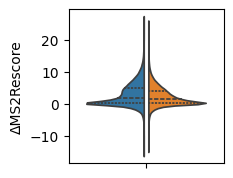

In [219]:
plt.figure(figsize=(2,2))
sns.violinplot(
    filtered_df,
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+'],
    y='ms2rescore_diff_gt_candidate',
    split=True,
    legend=False,
    inner='quart',
    gap=.075
)
plt.ylabel('ΔMS2Rescore')

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(
    filtered_df[filtered_df['refiner']=='Spectralis']['ms2rescore_diff_gt_candidate'],
    filtered_df[filtered_df['refiner']=='InstaNovo+']['ms2rescore_diff_gt_candidate']
)

TtestResult(statistic=96.36574797335855, pvalue=0.0, df=970319.0)

<Axes: xlabel='L(Gold Standard) - L(Refined PSM)', ylabel='%'>

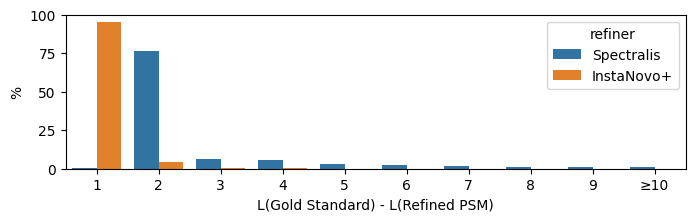

In [227]:
filtered_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'correct-perturbed')
]

l_count_df = filtered_df[['engine', 'L(Gold Standard) - L(Refined PSM)', 'refiner']]
l_count_df['L(Gold Standard) - L(Refined PSM)'] = l_count_df[
    ['L(Gold Standard) - L(Refined PSM)']
].astype(int)

l_count_df = l_count_df.groupby(['refiner', 'engine']).value_counts(normalize=True).reset_index()
l_count_df['%'] = l_count_df[0]*100
l_count_df = l_count_df.groupby(['refiner', 'L(Gold Standard) - L(Refined PSM)'])['%'].mean()
l_count_df = l_count_df.reset_index()

summary_plus_20 = l_count_df[l_count_df['L(Gold Standard) - L(Refined PSM)']>=10].groupby('refiner').sum().reset_index()
summary_plus_20['L(Gold Standard) - L(Refined PSM)'] = '≥10'

l_count_df = pd.concat([
    l_count_df[l_count_df['L(Gold Standard) - L(Refined PSM)']<10],
    summary_plus_20
], ignore_index=True)


plt.figure(figsize=(8,2))
# Create the normalized countplot
sns.barplot(
    data=l_count_df,
    x='L(Gold Standard) - L(Refined PSM)',
    order=[str(x) for x in range(1,10)]+['≥10'],
    y='%',
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+']
)

In [229]:
l_count_df[l_count_df['L(Gold Standard) - L(Refined PSM)'].isin([1, 2])].groupby('refiner').sum()

,%
refiner,
InstaNovo+,99.775742
Spectralis,77.276009


In [203]:
filtered_df.columns

Index(['type', 'engine', 'refiner', 'ms2rescore_diff_gt_candidate',
       'ms2rescore_diff_candidate_refinement', 'ms2rescore_diff_gt_refinement',
       'sc_gt_refinement', 'sc_gt_candidate', 'sc_candidate_refinement',
       'DL(Gold Standard) - DL(Refined PSM)',
       'DL(Gold Standard) - DL(de novo PSM)',
       'DL(de novo PSM) - DL(Refined PSM)',
       'L(Gold Standard) - L(Refined PSM)',
       'L(Gold Standard) - L(de novo PSM)', 'L(de novo PSM) - L(Refined PSM)'],
      dtype='object')

Text(0, 0.5, 'ΔMS2Rescore')

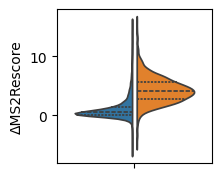

In [204]:
plt.figure(figsize=(2,2))
sns.violinplot(
    filtered_df,
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+'],
    y='ms2rescore_diff_candidate_refinement',
    split=True,
    legend=False,
    inner='quart',
    gap=.075
)
plt.ylabel('ΔMS2Rescore')

<Axes: xlabel='L(Gold Standard) - L(de novo PSM)', ylabel='%'>

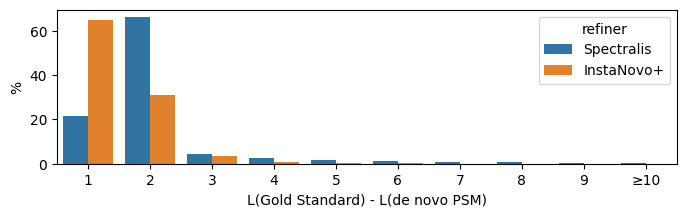

In [231]:
filtered_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'corrected-by-refinement')
]

l_count_df = filtered_df[['engine', 'L(Gold Standard) - L(de novo PSM)', 'refiner']]
l_count_df['L(Gold Standard) - L(de novo PSM)'] = l_count_df[
    ['L(Gold Standard) - L(de novo PSM)']
].astype(int)

l_count_df = l_count_df.groupby(['refiner', 'engine']).value_counts(normalize=True).reset_index()
l_count_df['%'] = l_count_df[0]*100
l_count_df = l_count_df.groupby(['refiner', 'L(Gold Standard) - L(de novo PSM)'])['%'].mean()
l_count_df = l_count_df.reset_index()

summary_plus_20 = l_count_df[l_count_df['L(Gold Standard) - L(de novo PSM)']>=10].groupby('refiner').sum().reset_index()
summary_plus_20['L(Gold Standard) - L(de novo PSM)'] = '≥10'

l_count_df = pd.concat([
    l_count_df[l_count_df['L(Gold Standard) - L(de novo PSM)']<10],
    summary_plus_20
], ignore_index=True)


plt.figure(figsize=(8,2))
# Create the normalized countplot
sns.barplot(
    data=l_count_df,
    x='L(Gold Standard) - L(de novo PSM)',
    order=[str(x) for x in range(1,10)]+['≥10'],
    y='%',
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+']
)

In [233]:
l_count_df[l_count_df['L(Gold Standard) - L(de novo PSM)'].isin([1, 2, 3])].groupby('refiner').sum()

,%
refiner,
InstaNovo+,99.200297
Spectralis,91.996021


Text(0, 0.5, 'ΔMS2Rescore')

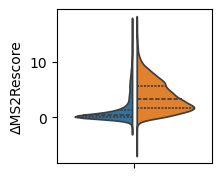

In [197]:
plt.figure(figsize=(2,2))
sns.violinplot(
    filtered_df,
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+'],
    y='ms2rescore_diff_gt_candidate',
    split=True,
    legend=False,
    inner='quart',
    gap=.075
)
plt.ylabel('ΔMS2Rescore')

In [248]:
filtered_df.columns

Index(['type', 'engine', 'refiner', 'ms2rescore_diff_gt_candidate',
       'ms2rescore_diff_candidate_refinement', 'ms2rescore_diff_gt_refinement',
       'sc_gt_refinement', 'sc_gt_candidate', 'sc_candidate_refinement',
       'DL(Gold Standard) - DL(Refined PSM)',
       'DL(Gold Standard) - DL(de novo PSM)',
       'DL(de novo PSM) - DL(Refined PSM)',
       'L(Gold Standard) - L(Refined PSM)',
       'L(Gold Standard) - L(de novo PSM)', 'L(de novo PSM) - L(Refined PSM)'],
      dtype='object')

<Axes: xlabel='ΔL', ylabel='%'>

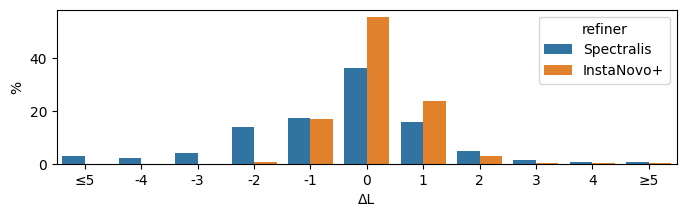

In [251]:
filtered_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-wrong')
]

filtered_df['ΔL'] = filtered_df.apply(
    lambda x: x['L(Gold Standard) - L(de novo PSM)'] - x['L(Gold Standard) - L(Refined PSM)'],
    axis=1
)

l_count_df = filtered_df[['engine', 'ΔL', 'refiner']]
l_count_df['ΔL'] = l_count_df[
    ['ΔL']
].astype(int)

l_count_df = l_count_df.groupby(['refiner', 'engine']).value_counts(normalize=True).reset_index()
l_count_df['%'] = l_count_df[0]*100
l_count_df = l_count_df.groupby(['refiner', 'ΔL'])['%'].mean()
l_count_df = l_count_df.reset_index()

summary_plus_5 = l_count_df[l_count_df['ΔL']>=5].groupby('refiner').sum().reset_index()
summary_plus_5['ΔL'] = '≥5'

summary_minus_5 = l_count_df[l_count_df['ΔL']<=-5].groupby('refiner').sum().reset_index()
summary_minus_5['ΔL'] = '≤5'

l_count_df = pd.concat([
    l_count_df[(l_count_df['ΔL']<5) & (l_count_df['ΔL']>-5)],
    summary_plus_5,
    summary_minus_5
], ignore_index=True)


plt.figure(figsize=(8,2))
# Create the normalized countplot
sns.barplot(
    data=l_count_df,
    x='ΔL',
    order=['≤5'] + [str(x) for x in range(-4,5)]+['≥5'],
    y='%',
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+']
)

In [ ]:
l_count_df[l_count_df['L(de novo PSM) - L(Refined PSM)'].isin([1, 2, 3])].groupby('refiner').sum()

Text(0, 0.5, 'ΔMS2Rescore')

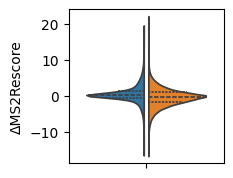

In [235]:
plt.figure(figsize=(2,2))
sns.violinplot(
    filtered_df,
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+'],
    y='ms2rescore_diff_candidate_refinement',
    split=True,
    legend=False,
    inner='quart',
    gap=.075
)
plt.ylabel('ΔMS2Rescore')

Text(0, 0.5, 'ΔMS2Rescore')

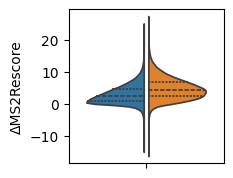

In [209]:
plt.figure(figsize=(2,2))
sns.violinplot(
    filtered_df,
    hue='refiner',
    hue_order=['Spectralis', 'InstaNovo+'],
    y='ms2rescore_diff_gt_candidate',
    split=True,
    legend=False,
    inner='quart',
    gap=.075
)
plt.ylabel('ΔMS2Rescore')

<Axes: xlabel='L(Gold Standard) - L(de novo PSM)', ylabel='percentage'>

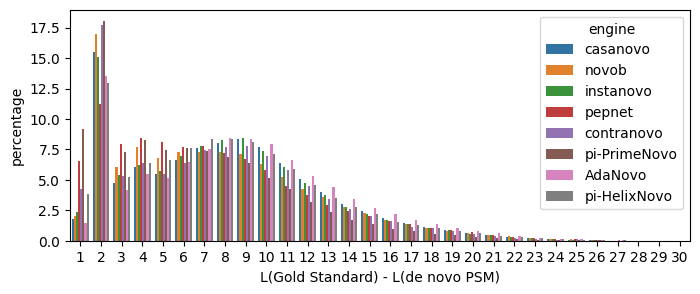

In [274]:
import seaborn as sns
import pandas as pd

# Filter the data
filtered_df = levenshtein_df.loc[
    (levenshtein_df['type'] != 'correct-perturbed') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'L(Gold Standard) - L(de novo PSM)']
]
filtered_df['L(Gold Standard) - L(de novo PSM)'] = filtered_df[
    'L(Gold Standard) - L(de novo PSM)'
].astype(int)

# Calculate percentages by 'engine' (hue)
normalized_df = (
    filtered_df
    .groupby(['engine', 'L(Gold Standard) - L(de novo PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)


plt.figure(figsize=(8,3))
# Create the normalized countplot
sns.barplot(
    data=normalized_df,
    x='L(Gold Standard) - L(de novo PSM)',
    y='percentage',
    hue='engine',
    hue_order=denovo_engines
)


In [26]:
# Filter the data
filtered_df_spectralis = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-unperturbed') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'levenshtein_candidate']
]
filtered_df_instanovoplus = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-unperturbed') & (levenshtein_df['refiner'] == 'InstaNovo+'),
    ['engine', 'levenshtein_candidate']
]

# Calculate percentages by 'engine' (hue)
normalized_df = (
    filtered_df
    .groupby(['engine', 'levenshtein_candidate'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Create the normalized countplot
sns.barplot(
    data=normalized_df,
    x='levenshtein_candidate',
    y='percentage',
    hue='engine'
)


KeyError: "['levenshtein_candidate'] not in index"

## 4.2 Wrong and unperturbed PSMs

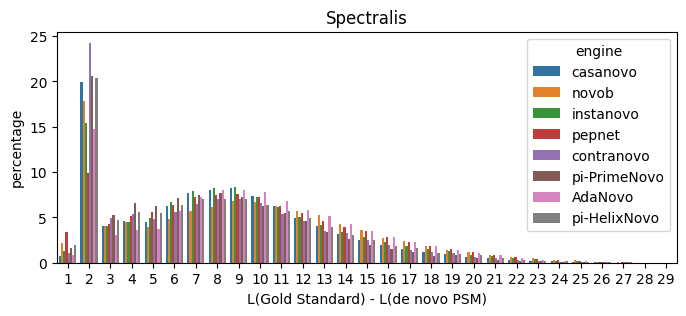

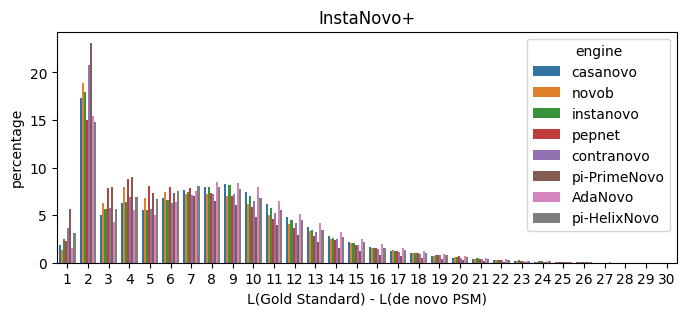

In [36]:
# UNNORMALIZED BY HUE
# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='wrong-unperturbed') & (levenshtein_df['refiner']=='Spectralis'),
#         ['engine', 'levenshtein_candidate']
#     ],
#     x='levenshtein_candidate',
#     hue='engine',
#     ax=ax[0]
# )
# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='wrong-unperturbed') & (levenshtein_df['refiner']=='InstaNovo+'),
#         ['engine', 'levenshtein_candidate']
#     ],
#     x='levenshtein_candidate',
#     hue='engine',
#     ax=ax[1]
# )

# Filter the data
filtered_df_spectralis = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-unperturbed') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'L(Gold Standard) - L(de novo PSM)']
]
filtered_df_spectralis[
    'L(Gold Standard) - L(de novo PSM)'
] = filtered_df_spectralis['L(Gold Standard) - L(de novo PSM)'].astype(int)

filtered_df_instanovoplus = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-unperturbed') & (levenshtein_df['refiner'] == 'InstaNovo+'),
    ['engine', 'L(Gold Standard) - L(de novo PSM)']
]
filtered_df_instanovoplus[
    'L(Gold Standard) - L(de novo PSM)'
] = filtered_df_instanovoplus['L(Gold Standard) - L(de novo PSM)'].astype(int)

# Calculate percentages by 'engine' (hue)
normalized_df_spectralis = (
    filtered_df_spectralis
    .groupby(['engine', 'L(Gold Standard) - L(de novo PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)
normalized_df_instanovoplus = (
    filtered_df_instanovoplus
    .groupby(['engine', 'L(Gold Standard) - L(de novo PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

plt.figure(figsize=(8,3))
plt.title('Spectralis')
sns.barplot(
    data=normalized_df_spectralis,
    x='L(Gold Standard) - L(de novo PSM)',
    y='percentage',
    hue='engine',
    hue_order=denovo_engines
)
plt.show()

plt.figure(figsize=(8,3))
plt.title('InstaNovo+')
sns.barplot(
    data=normalized_df_instanovoplus,
    x='L(Gold Standard) - L(de novo PSM)',
    y='percentage',
    hue='engine',
    hue_order=denovo_engines
)
plt.show()

In [28]:
filtered_df_instanovoplus.groupby('engine').value_counts(normalize=True).reset_index().groupby(
    'L(Gold Standard) - L(de novo PSM)'
)[0].mean().cumsum() *100

L(Gold Standard) - L(de novo PSM)
1       2.764935
2      20.686133
3      26.737968
4      33.977886
5      40.338264
6      47.381086
7      54.866900
8      62.455400
9      69.931507
10     76.516231
11     81.845526
12     86.053819
13     89.353273
14     91.872425
15     93.857916
16     95.395019
17     96.608103
18     97.558487
19     98.305516
20     98.863192
21     99.250684
22     99.521732
23     99.711405
24     99.831992
25     99.921402
26     99.977636
27     99.994300
28     99.999204
29    100.000970
30    100.002039
Name: 0, dtype: float64

In [29]:
filtered_df_spectralis.groupby('engine').value_counts(normalize=True).reset_index().groupby(
    'L(Gold Standard) - L(de novo PSM)'
)[0].mean().cumsum() *100

L(Gold Standard) - L(de novo PSM)
1       1.634267
2      19.517705
3      23.822118
4      28.806826
5      33.694577
6      39.801336
7      46.925079
8      54.402108
9      61.927076
10     68.866216
11     74.914844
12     80.064048
13     84.333137
14     87.828202
15     90.685630
16     92.935252
17     94.748336
18     96.155188
19     97.315840
20     98.177040
21     98.797168
22     99.227565
23     99.534745
24     99.730912
25     99.868997
26     99.962127
27     99.991966
28     99.999455
29    100.003405
Name: 0, dtype: float64

In [38]:
denovo_engines

['casanovo',
 'novob',
 'instanovo',
 'pepnet',
 'contranovo',
 'pi-PrimeNovo',
 'AdaNovo',
 'pi-HelixNovo']

In [41]:
from statannotations.Annotator import Annotator
# Define the desired order for the y-axis


# Filter data for both refiners
def plot_boxplot_score_diff(df, refinement_type, score_label, xlabel='Score Ground-truth - Score de novo'):

    spectralis_data = df.loc[
        (df['type'] == refinement_type) & (df['refiner'] == 'Spectralis')
    ]
    instanovo_data = df.loc[
        (df['type'] == refinement_type) & (df['refiner'] == 'InstaNovo+')
    ]

    # Calculate the overall x-axis range
    x_min = min(spectralis_data[score_label].min(), instanovo_data[score_label].min())
    x_max = max(spectralis_data[score_label].max(), instanovo_data[score_label].max())

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    # Plot for Spectralis
    sns.boxplot(
        data=spectralis_data,
        x=score_label,
        y='engine',
        order=denovo_engines,
        ax=ax[0]
    )

    # Plot for InstaNovo+
    sns.boxplot(
        data=instanovo_data,
        x=score_label,
        y='engine',
        order=denovo_engines,
        ax=ax[1]
    )

    # Set the x-axis range for both plots
    ax[0].set_xlim(x_min-.5, x_max+.5)
    ax[1].set_xlim(x_min-.5, x_max+.5)

    # Add labels and titles
    ax[0].set_title('Spectralis')
    ax[1].set_title('InstaNovo+')

    
    ax[0].set_xlabel(xlabel)
    ax[1].set_xlabel(xlabel)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


denovo_engines_renamed = [
    'CasaNovo',
    'NovoB',
    'InstaNovo',
    'PepNet',
    'ContraNovo',
    'π-PrimeNovo',
    'AdaNovo',
    'π-HelixNovo'
]

def plot_boxplot_score_diff(df, refinement_type, score_label, pairs, xlabel='De Novo Model', ylabel='Score Gold-Standard PSM - Score De Novo PSM'):
    model_name_dict = {
        'casanovo': 'CasaNovo',
        'instanovo': 'InstaNovo',
        'novob': 'NovoB',
        'pepnet': 'PepNet',
        'contranovo': 'ContraNovo',
        'pi-HelixNovo': 'π-HelixNovo',
        'pi-PrimeNovo': 'π-PrimeNovo',
        'AdaNovo': 'AdaNovo'
    }

    boxplot_data = df.loc[
        (df['type'] == refinement_type)
    ]
    boxplot_data['De Novo Model'] = boxplot_data.engine.apply(
        lambda x: model_name_dict[x]
    )

    # Calculate the overall x-axis range
    x_min = boxplot_data[score_label].min()
    x_max = boxplot_data[score_label].max()

    # Create subplots

    # Plot for Spectralis
    ax=sns.boxplot(
        data=boxplot_data,
        y=score_label,
        x='De Novo Model',
        order=denovo_engines_renamed,
        hue='refiner',
        hue_order=['Spectralis', 'InstaNovo+'],
    )

    print(ax, pairs)

    annot = Annotator(
        ax,
        pairs,
        data=boxplot_data,
        y=score_label,
        x='De Novo Model',
        order=denovo_engines_renamed,
        hue='refiner',
        hue_order=['Spectralis', 'InstaNovo+']
    )
    annot.configure(test='t-test_ind', verbose=2)
    annot.apply_test()
    annot.annotate()

    # Set the x-axis range for both plots
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    # Adjust layout
    plt.tight_layout()
    plt.show()

Axes(0.125,0.11;0.775x0.77) [(('CasaNovo', 'Spectralis'), ('CasaNovo', 'InstaNovo+')), (('NovoB', 'Spectralis'), ('NovoB', 'InstaNovo+')), (('InstaNovo', 'Spectralis'), ('InstaNovo', 'InstaNovo+')), (('PepNet', 'Spectralis'), ('PepNet', 'InstaNovo+')), (('ContraNovo', 'Spectralis'), ('ContraNovo', 'InstaNovo+')), (('π-PrimeNovo', 'Spectralis'), ('π-PrimeNovo', 'InstaNovo+')), (('AdaNovo', 'Spectralis'), ('AdaNovo', 'InstaNovo+')), (('π-HelixNovo', 'Spectralis'), ('π-HelixNovo', 'InstaNovo+'))]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

NovoB_Spectralis vs. NovoB_InstaNovo+: t-test independent samples, P_val:1.030e-277 t=3.569e+01
CasaNovo_Spectralis vs. CasaNovo_InstaNovo+: t-test independent samples, P_val:7.969e-83 t=-1.929e+01
InstaNovo_Spectralis vs. InstaNovo_InstaNovo+: t-test independent samples, P_val:1.696e-164 t=2.738e+01
PepNet_

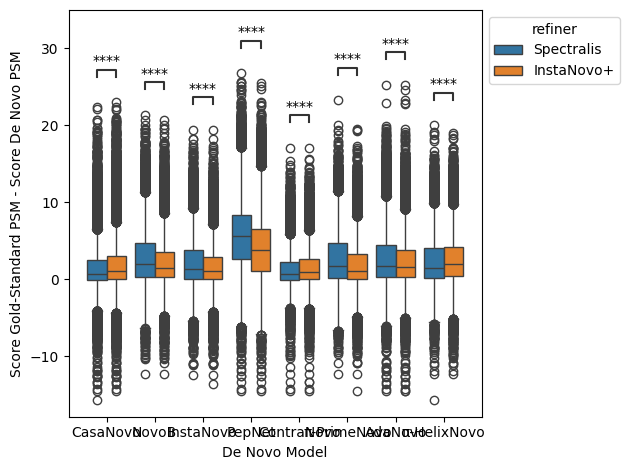

In [44]:
pairs = [((i, r1), (i, r2)) for i, (r1, r2) in zip(
    denovo_engines_renamed,
    [['Spectralis', 'InstaNovo+']]*len(denovo_engines_renamed)
    )
]

plot_boxplot_score_diff(
    df=levenshtein_df,
    refinement_type='wrong-unperturbed',
    score_label='ms2rescore_diff_gt_candidate',
    pairs=pairs
)

## 4.3 Correct and falsely perturbed PSMs

<Axes: title={'center': 'InstaNovo+'}, xlabel='L(Gold Standard) - L(Refined PSM)', ylabel='percentage'>

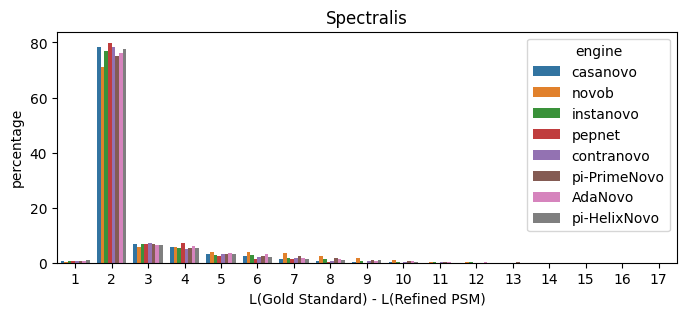

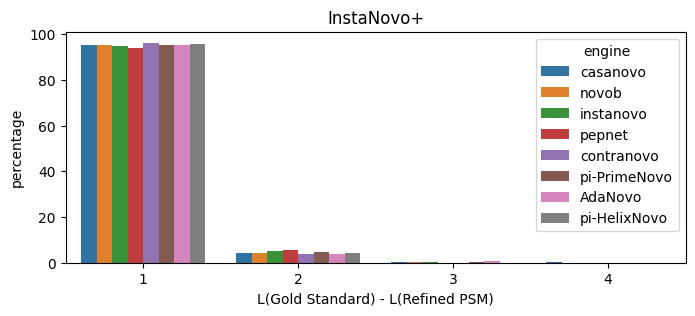

In [45]:
# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='correct-perturbed') & (levenshtein_df['refiner']=='Spectralis'),
#         ['engine', 'L(Gold Standard) - L(Refined PSM)']
#     ],
#     x='L(Gold Standard) - L(Refined PSM)',
#     hue='engine',
#     ax=ax[0]
# )
# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='correct-perturbed') & (levenshtein_df['refiner']=='InstaNovo+'),
#         ['engine', 'L(Gold Standard) - L(Refined PSM)']
#     ],
#     x='L(Gold Standard) - L(Refined PSM)',
#     hue='engine',
#     ax=ax[1]
# )
# Filter and normalize data for 'Spectralis'
spectralis_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'correct-perturbed') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'L(Gold Standard) - L(Refined PSM)']
]
spectralis_df['L(Gold Standard) - L(Refined PSM)'] = spectralis_df['L(Gold Standard) - L(Refined PSM)'].astype(int)

spectralis_normalized = (
    spectralis_df
    .groupby(['engine', 'L(Gold Standard) - L(Refined PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Filter and normalize data for 'InstaNovo+'
instanovo_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'correct-perturbed') & (levenshtein_df['refiner'] == 'InstaNovo+'),
    ['engine', 'L(Gold Standard) - L(Refined PSM)']
]
instanovo_df['L(Gold Standard) - L(Refined PSM)'] = instanovo_df['L(Gold Standard) - L(Refined PSM)'].astype(int)
instanovo_normalized = (
    instanovo_df
    .groupby(['engine', 'L(Gold Standard) - L(Refined PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Create the first plot for 'Spectralis'
plt.figure(figsize=(8,3))
plt.title('Spectralis')
sns.barplot(
    data=spectralis_normalized,
    x='L(Gold Standard) - L(Refined PSM)',
    y='percentage',
    hue='engine',
    hue_order=denovo_engines
)

# Create the second plot for 'InstaNovo+'
plt.figure(figsize=(8,3))
plt.title('InstaNovo+')
sns.barplot(
    data=instanovo_normalized,
    x='L(Gold Standard) - L(Refined PSM)',
    y='percentage',
    hue='engine',
    hue_order=denovo_engines
)

In [46]:
instanovo_df.groupby('engine').value_counts(normalize=True).reset_index().groupby(
    'L(Gold Standard) - L(Refined PSM)'
)[0].mean().cumsum() *100

L(Gold Standard) - L(Refined PSM)
1     95.357307
2     99.775742
3    100.104020
4    100.256692
Name: 0, dtype: float64

In [47]:
spectralis_df.groupby('engine').value_counts(normalize=True).reset_index().groupby(
    'L(Gold Standard) - L(Refined PSM)'
)[0].mean().cumsum() *100

L(Gold Standard) - L(Refined PSM)
1       0.630692
2      77.276009
3      83.870571
4      89.615120
5      92.810607
6      95.414876
7      97.331833
8      98.555962
9      99.414033
10     99.857133
11    100.043756
12    100.115265
13    100.163081
14    100.200310
15    100.216437
16    100.234261
17    100.242788
Name: 0, dtype: float64

Text(0.5, 1.0, 'InstaNovo+')

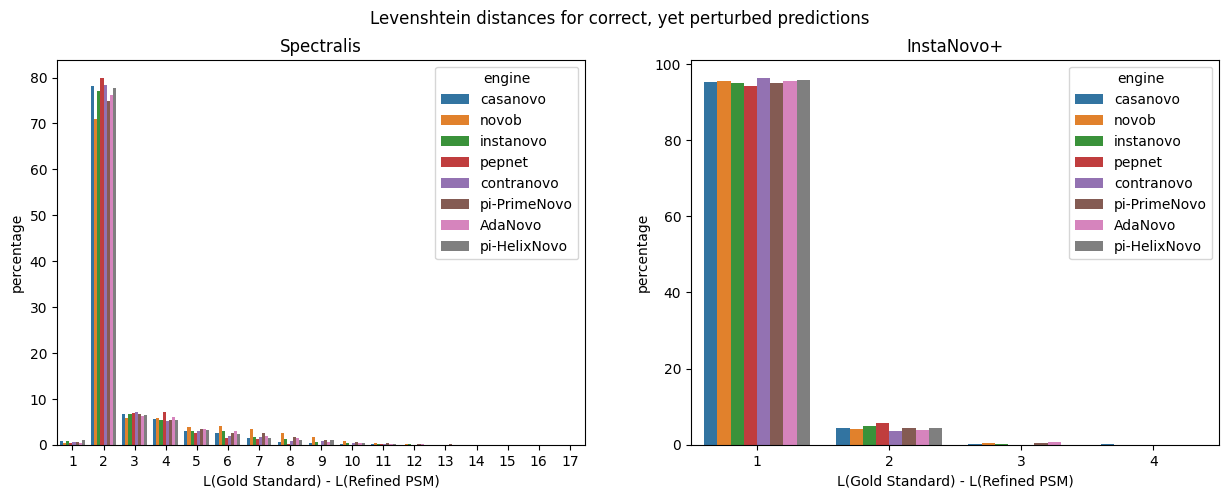

In [61]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='correct-perturbed') & (levenshtein_df['refiner']=='Spectralis'),
#         ['engine', 'L(Gold Standard) - L(Refined PSM)']
#     ],
#     x='L(Gold Standard) - L(Refined PSM)',
#     hue='engine',
#     ax=ax[0]
# )
# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='correct-perturbed') & (levenshtein_df['refiner']=='InstaNovo+'),
#         ['engine', 'L(Gold Standard) - L(Refined PSM)']
#     ],
#     x='L(Gold Standard) - L(Refined PSM)',
#     hue='engine',
#     ax=ax[1]
# )
# Filter and normalize data for 'Spectralis'
spectralis_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'correct-perturbed') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'L(Gold Standard) - L(Refined PSM)']
]
spectralis_normalized = (
    spectralis_df
    .groupby(['engine', 'L(Gold Standard) - L(Refined PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Filter and normalize data for 'InstaNovo+'
instanovo_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'correct-perturbed') & (levenshtein_df['refiner'] == 'InstaNovo+'),
    ['engine', 'L(Gold Standard) - L(Refined PSM)']
]
instanovo_normalized = (
    instanovo_df
    .groupby(['engine', 'L(Gold Standard) - L(Refined PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Create the first plot for 'Spectralis'
spectralis_normalized['L(Gold Standard) - L(Refined PSM)'] = spectralis_normalized['L(Gold Standard) - L(Refined PSM)'].astype(int)
sns.barplot(
    data=spectralis_normalized,
    x='L(Gold Standard) - L(Refined PSM)',
    y='percentage',
    hue='engine',
    hue_order=denovo_engines,
    ax=ax[0]
)

# Create the second plot for 'InstaNovo+'
instanovo_normalized['L(Gold Standard) - L(Refined PSM)'] = instanovo_normalized['L(Gold Standard) - L(Refined PSM)'].astype(int)
sns.barplot(
    data=instanovo_normalized,
    x='L(Gold Standard) - L(Refined PSM)',
    y='percentage',
    hue='engine',
    hue_order=denovo_engines,
    ax=ax[1]
)

fig.suptitle('Levenshtein distances for correct, yet perturbed predictions')
ax[0].set_title('Spectralis')
ax[1].set_title('InstaNovo+')

In [65]:
spectralis_df.groupby('engine').apply(len)

engine
AdaNovo          4685
casanovo         6489
contranovo       5587
instanovo        9457
novob            9109
pepnet           1492
pi-HelixNovo     4192
pi-PrimeNovo    11727
dtype: int64

In [66]:
instanovo_df.groupby('engine').apply(len)

engine
AdaNovo         495
casanovo        655
contranovo      493
instanovo       791
novob           510
pepnet          208
pi-HelixNovo    421
pi-PrimeNovo    824
dtype: int64

In [67]:
from scipy import stats

In [68]:
stat_results = []
for refiner in ['Spectralis', 'InstaNovo+']:
    for engine in engine_order:
        ms2rescore_differences = levenshtein_df.loc[
            (levenshtein_df['type']=='correct-perturbed') &
            (levenshtein_df['refiner'] == refiner) &
            (levenshtein_df['engine'] == engine),
            'ms2rescore_diff_gt_refinement'
        ].tolist()

        stat_result = stats.ttest_1samp(ms2rescore_differences, 0)
        stat_results.append(
            {
                'refiner': refiner,
                'model': engine,
                'stat': stat_result
            }
        )

In [69]:
pd.DataFrame(stat_results)

,refiner,model,stat
0,Spectralis,casanovo,"(54.23969892564328, 0.0)"
1,Spectralis,novob,"(64.57780377061331, 0.0)"
2,Spectralis,instanovo,"(65.25266202503718, 0.0)"
3,Spectralis,contranovo,"(49.10923208713874, 0.0)"
4,Spectralis,pepnet,"(26.305451128011065, 1.350370243749157e-125)"
5,InstaNovo+,casanovo,"(52.32098558652806, 6.2625343581895594e-236)"
6,InstaNovo+,novob,"(46.64873697610161, 6.0653449278956994e-186)"
7,InstaNovo+,instanovo,"(53.83257001907379, 1.5417295320106912e-266)"
8,InstaNovo+,contranovo,"(43.02663020966348, 7.126028507984424e-169)"
9,InstaNovo+,pepnet,"(27.765400418231845, 1.0027077218320408e-71)"


In [70]:
plot_boxplot_score_diff(
    df=levenshtein_df,
    refinement_type='correct-perturbed',
    score_label='ms2rescore_diff_gt_refinement'
)

TypeError: plot_boxplot_score_diff() missing 1 required positional argument: 'pairs'

## 4.4 Correctly refined sequences

In [71]:
levenshtein_df.columns

Index(['type', 'engine', 'refiner', 'ms2rescore_diff_gt_candidate',
       'ms2rescore_diff_candidate_refinement', 'ms2rescore_diff_gt_refinement',
       'sc_gt_refinement', 'sc_gt_candidate', 'sc_candidate_refinement',
       'DL(Gold Standard) - DL(Refined PSM)',
       'DL(Gold Standard) - DL(de novo PSM)',
       'DL(de novo PSM) - DL(Refined PSM)',
       'L(Gold Standard) - L(Refined PSM)',
       'L(Gold Standard) - L(de novo PSM)', 'L(de novo PSM) - L(Refined PSM)'],
      dtype='object')

Text(0.5, 1.0, 'InstaNovo+')

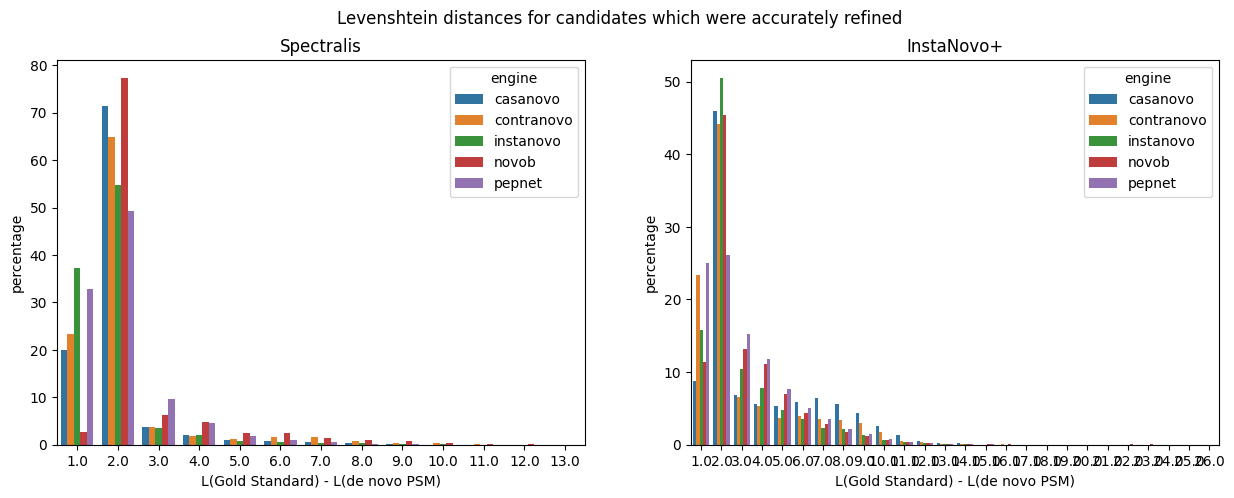

In [226]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='corrected-by-refinement') & (levenshtein_df['refiner']=='Spectralis'),
#         ['engine', 'L(Gold Standard) - L(de novo PSM)']
#     ],
#     x='L(Gold Standard) - L(de novo PSM)',
#     hue='engine',
#     ax=ax[0]
# )
# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='corrected-by-refinement') & (levenshtein_df['refiner']=='InstaNovo+'),
#         ['engine', 'L(Gold Standard) - L(de novo PSM)']
#     ],
#     x='L(Gold Standard) - L(de novo PSM)',
#     hue='engine',
#     ax=ax[1]
# )

spectralis_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'corrected-by-refinement') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'L(Gold Standard) - L(de novo PSM)']
]
spectralis_normalized = (
    spectralis_df
    .groupby(['engine', 'L(Gold Standard) - L(de novo PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Filter and normalize data for 'InstaNovo+'
instanovo_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'corrected-by-refinement') & (levenshtein_df['refiner'] == 'InstaNovo+'),
    ['engine', 'L(Gold Standard) - L(de novo PSM)']
]
instanovo_normalized = (
    instanovo_df
    .groupby(['engine', 'L(Gold Standard) - L(de novo PSM)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Create the first plot for 'Spectralis'
sns.barplot(
    data=spectralis_normalized,
    x='L(Gold Standard) - L(de novo PSM)',
    y='percentage',
    hue='engine',
    ax=ax[0]
)

# Create the second plot for 'InstaNovo+'
sns.barplot(
    data=instanovo_normalized,
    x='L(Gold Standard) - L(de novo PSM)',
    y='percentage',
    hue='engine',
    ax=ax[1]
)

fig.suptitle('Levenshtein distances for candidates which were accurately refined')
ax[0].set_title('Spectralis')
ax[1].set_title('InstaNovo+')

In [238]:
spectralis_df.groupby('engine').value_counts(normalize=True).reset_index().groupby(
    'L(Gold Standard) - L(de novo PSM)'
)[0].mean().cumsum() *100

L(Gold Standard) - L(de novo PSM)
1.0      23.240403
2.0      86.816751
3.0      92.194636
4.0      95.247793
5.0      96.690477
6.0      98.010907
7.0      98.885166
8.0      99.412485
9.0      99.714265
10.0     99.877670
11.0    100.018496
12.0    100.102758
13.0    100.123406
Name: 0, dtype: float64

In [239]:
instanovo_df.groupby('engine').value_counts(normalize=True).reset_index().groupby(
    'L(Gold Standard) - L(de novo PSM)'
)[0].mean().cumsum() *100

L(Gold Standard) - L(de novo PSM)
1.0      16.888191
2.0      59.319334
3.0      69.772520
4.0      78.122177
5.0      83.810552
6.0      88.364873
7.0      92.099502
8.0      95.126546
9.0      97.373707
10.0     98.664379
11.0     99.267004
12.0     99.604314
13.0     99.762875
14.0     99.884093
15.0     99.924939
16.0     99.959632
17.0     99.977080
18.0     99.989016
19.0    100.002044
20.0    100.018453
21.0    100.026058
22.0    100.073802
23.0    100.109610
24.0    100.121546
25.0    100.145418
26.0    100.169290
Name: 0, dtype: float64

In [120]:
levenshtein_df.columns

Index(['type', 'engine', 'refiner', 'levenshtein_candidate',
       'levenshtein_refinement', 'levenshtein_candidate_refinement', 'changes',
       'ms2rescore_diff', 'ms2rescore_diff_candidate_refinement',
       'ms2rescore_diff_gt_refinement',
       'diff_levenshtein_candidate_refinement'],
      dtype='object')

In [125]:
levenshtein_df.columns

Index(['type', 'engine', 'refiner', 'levenshtein_candidate',
       'levenshtein_refinement', 'levenshtein_candidate_refinement', 'changes',
       'ms2rescore_diff_candidate_refinement', 'ms2rescore_diff_gt_refinement',
       'ms2rescore_diff_gt_candidate'],
      dtype='object')

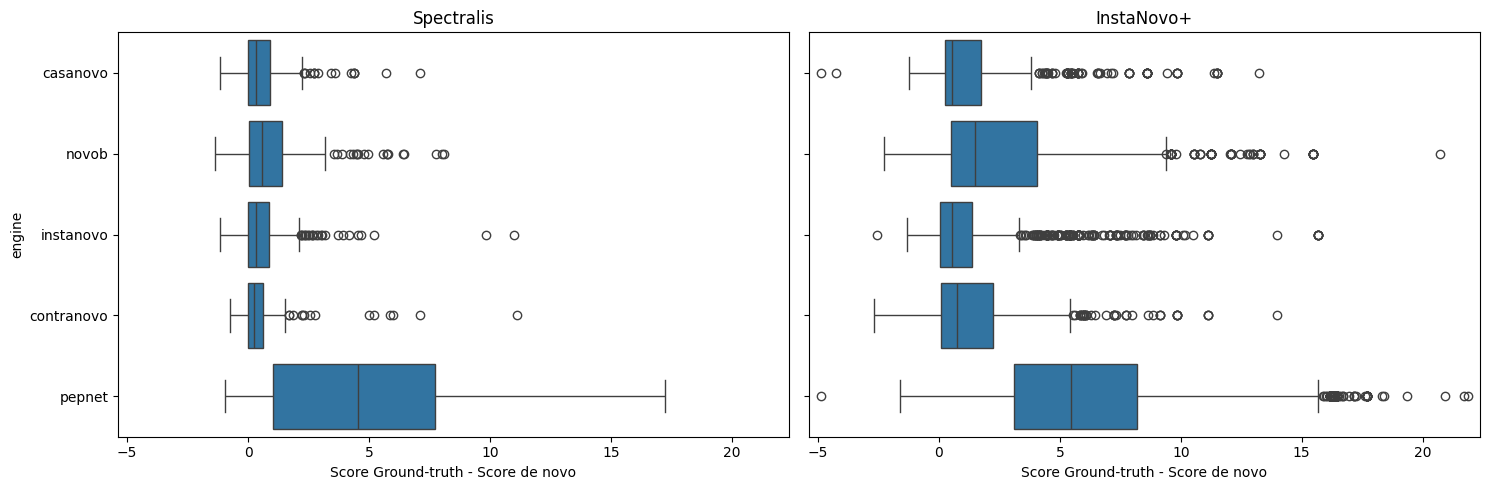

In [141]:
plot_boxplot_score_diff(
    df=levenshtein_df,
    refinement_type='corrected-by-refinement',
    score_label='ms2rescore_diff_gt_candidate'
)

## 4.5 Wrong sequence perturbed to another wrong sequence

In [97]:
levenshtein_df['diff_levenshtein_candidate_refinement'] = levenshtein_df.apply(
    lambda x: x['levenshtein_candidate'] - x['levenshtein_refinement'],
    axis=1
)

Text(0.5, 1.0, 'InstaNovo+')

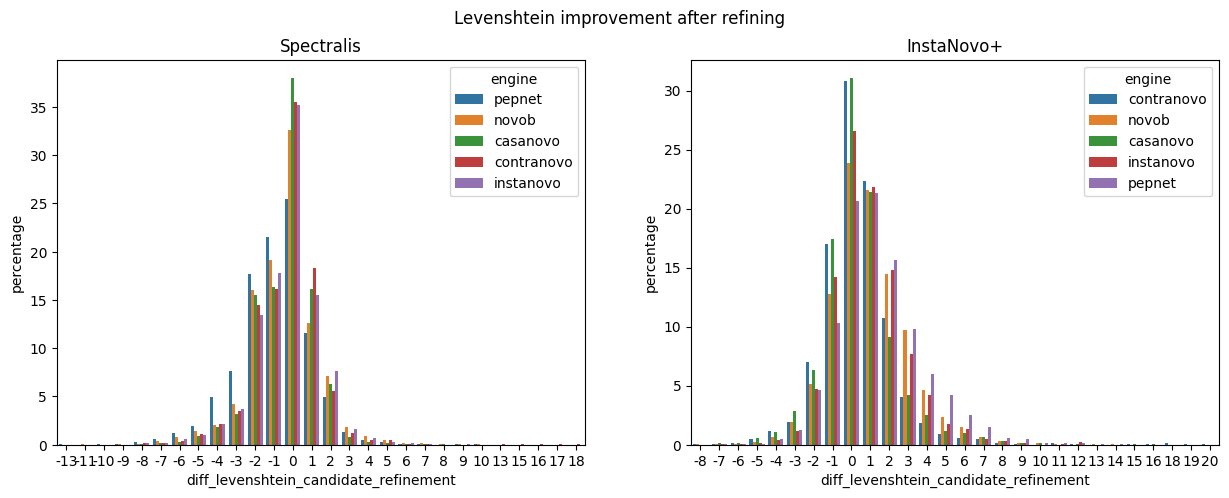

In [111]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='wrong-wrong') & (levenshtein_df['refiner']=='Spectralis'),
#         ['engine', 'diff_levenshtein_candidate_refinement']
#     ],
#     x='diff_levenshtein_candidate_refinement',
#     hue='engine',
#     ax=ax[0]
# )
# sns.countplot(
#     levenshtein_df.loc[
#         (levenshtein_df['type']=='wrong-wrong') & (levenshtein_df['refiner']=='InstaNovo+'),
#         ['engine', 'diff_levenshtein_candidate_refinement']
#     ],
#     x='diff_levenshtein_candidate_refinement',
#     hue='engine',
#     ax=ax[1]
# )

# Filter and normalize data for 'Spectralis'
spectralis_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-wrong') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'diff_levenshtein_candidate_refinement']
]
spectralis_normalized = (
    spectralis_df
    .groupby(['engine', 'diff_levenshtein_candidate_refinement'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Filter and normalize data for 'InstaNovo+'
instanovo_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-wrong') & (levenshtein_df['refiner'] == 'InstaNovo+'),
    ['engine', 'diff_levenshtein_candidate_refinement']
]
instanovo_normalized = (
    instanovo_df
    .groupby(['engine', 'diff_levenshtein_candidate_refinement'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Create the first plot for 'Spectralis'
sns.barplot(
    data=spectralis_normalized,
    x='diff_levenshtein_candidate_refinement',
    y='percentage',
    hue='engine',
    ax=ax[0]
)

# Create the second plot for 'InstaNovo+'
sns.barplot(
    data=instanovo_normalized,
    x='diff_levenshtein_candidate_refinement',
    y='percentage',
    hue='engine',
    ax=ax[1]
)

fig.suptitle('Levenshtein improvement after refining')
ax[0].set_title('Spectralis')
ax[1].set_title('InstaNovo+')

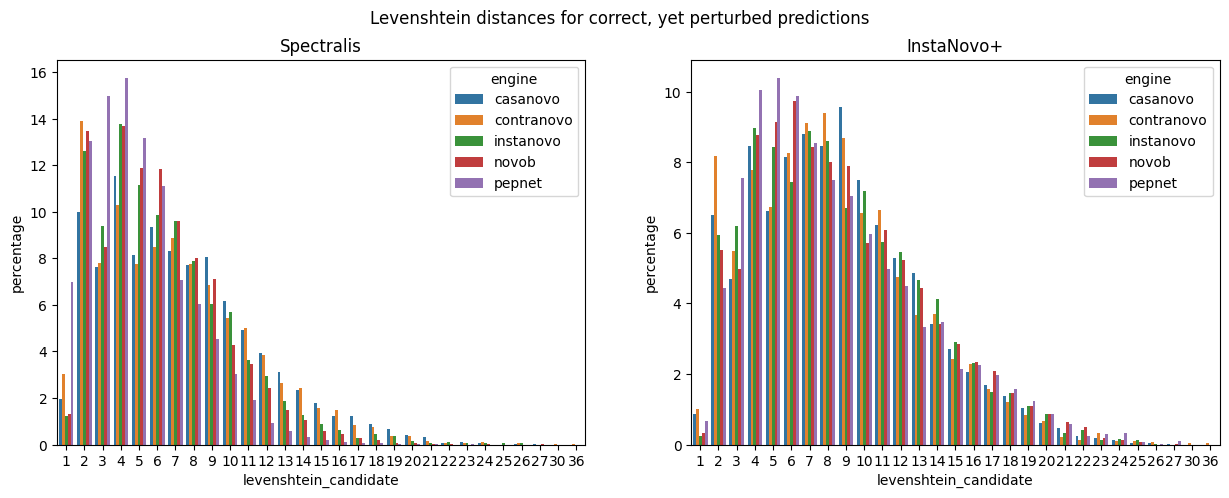

: 

In [161]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Filter and normalize data for 'Spectralis'
spectralis_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-wrong') & (levenshtein_df['refiner'] == 'Spectralis'),
    ['engine', 'levenshtein_candidate']
]
spectralis_normalized = (
    spectralis_df
    .groupby(['engine', 'levenshtein_candidate'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Filter and normalize data for 'InstaNovo+'
instanovo_df = levenshtein_df.loc[
    (levenshtein_df['type'] == 'wrong-wrong') & (levenshtein_df['refiner'] == 'InstaNovo+'),
    ['engine', 'levenshtein_candidate']
]
instanovo_normalized = (
    instanovo_df
    .groupby(['engine', 'levenshtein_candidate'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name='percentage')
)

# Create the first plot for 'Spectralis'
sns.barplot(
    data=spectralis_normalized,
    x='levenshtein_candidate',
    y='percentage',
    hue='engine',
    ax=ax[0]
)

# Create the second plot for 'InstaNovo+'
sns.barplot(
    data=instanovo_normalized,
    x='levenshtein_candidate',
    y='percentage',
    hue='engine',
    ax=ax[1]
)

fig.suptitle('Levenshtein distances for correct, yet perturbed predictions')
ax[0].set_title('Spectralis')
ax[1].set_title('InstaNovo+')
plt.show()

Text(0.5, 1.0, 'InstaNovo+')

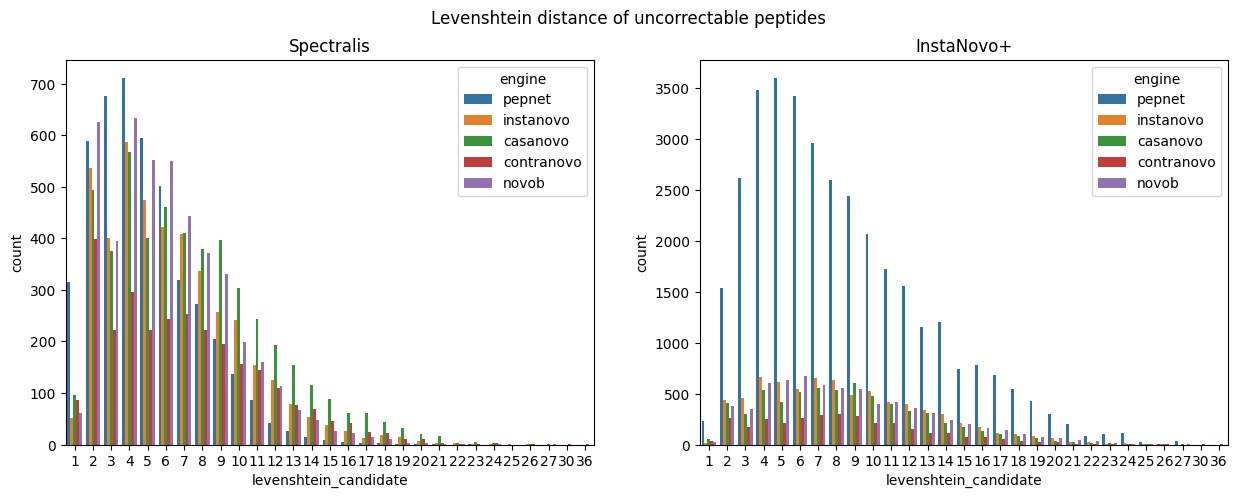

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(
    levenshtein_df.loc[
        (levenshtein_df['type']=='wrong-wrong') & (levenshtein_df['refiner']=='Spectralis'),
        ['engine', 'levenshtein_candidate']
    ],
    x='levenshtein_candidate',
    hue='engine',
    ax=ax[0]
)
sns.countplot(
    levenshtein_df.loc[
        (levenshtein_df['type']=='wrong-wrong') & (levenshtein_df['refiner']=='InstaNovo+'),
        ['engine', 'levenshtein_candidate']
    ],
    x='levenshtein_candidate',
    hue='engine',
    ax=ax[1]
)

fig.suptitle('Levenshtein distance of uncorrectable peptides')
ax[0].set_title('Spectralis')
ax[1].set_title('InstaNovo+')

In [127]:
levenshtein_df.columns

Index(['type', 'engine', 'refiner', 'levenshtein_candidate',
       'levenshtein_refinement', 'levenshtein_candidate_refinement', 'changes',
       'ms2rescore_diff_candidate_refinement', 'ms2rescore_diff_gt_refinement',
       'ms2rescore_diff_gt_candidate'],
      dtype='object')

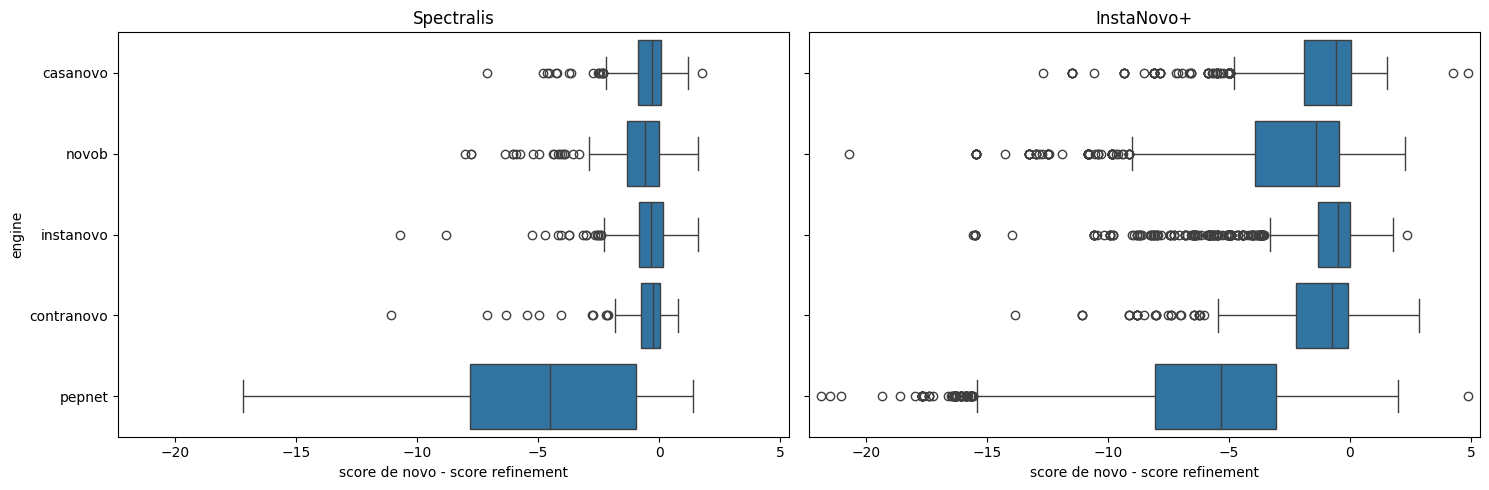

In [ ]:
plot_boxplot_score_diff(
    df=levenshtein_df,
    refinement_type='corrected-by-refinement',
    score_label='ms2rescore_diff_candidate_refinement',
    xlabel='score de novo - score refinement'
)

Text(0.5, 0, 'score Ground-truth - score de novo')

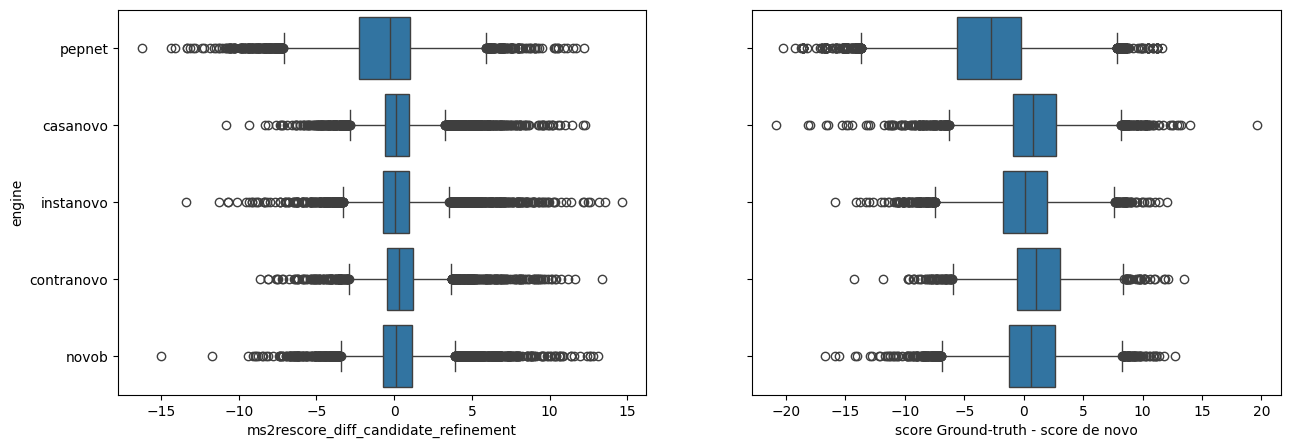

In [143]:
# Ground-truth is still lot of times better than the candidate. The algorihtm, just doesnt know what to do
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
sns.boxplot(
    levenshtein_df.loc[
        (levenshtein_df['type']=='wrong-wrong') & (levenshtein_df['refiner']=='Spectralis'),
        ['engine', 'ms2rescore_diff_candidate_refinement', 'ms2rescore_diff_gt_candidate']
    ],
    x='ms2rescore_diff_candidate_refinement',
    y='engine',
    ax=ax[0]
)
sns.boxplot(
    levenshtein_df.loc[
        (levenshtein_df['type']=='wrong-wrong') & (levenshtein_df['refiner']=='InstaNovo+'),
        ['engine', 'ms2rescore_diff_candidate_refinement', 'ms2rescore_diff_gt_candidate']
    ],
    x='ms2rescore_diff_candidate_refinement',
    y='engine',
    ax=ax[1]
)

plt.xlabel('score Ground-truth - score de novo')